# <center> Data Glacier Intern Week 2 Deliverables </center><br> #
### <center> EDA, Data Intake Report, EDA Recommendations & hypothesis results<br>Xiaoqing (Lucy) Leng </center> ###

<b>The Client</b><br>

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

<b>Project delivery</b><br>

There are multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using actionable insights to help them identify the right company to make their investment.

The outcome of delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of the analysis and the value of the recommendations and insights. 

<b>About Data Set</b><br>

There are in total 4 individual data sets. Time period of data is from **31/01/2016 to 31/12/2018**.

Below are the list of datasets which are provided for the analysis:

**Cab_Data.csv** – this file includes details of transaction for 2 cab companies

**Customer_ID.csv** – this is a mapping table that contains a unique identifier which links the customer’s demographic details

**Transaction_ID.csv** – this is a mapping table that contains transaction to customer mapping and payment mode

**City.csv** – this file contains list of US cities, their population and number of cab users

**Business Objectives**      
In this analysis, we are going to compare features from different companies and decide which to invest. Therefore, we will consider mostly the total transaction/profit, customer groups, and geographical distributions of the data. We start first by plotting the time series to gain some insights from date of travels.

In [55]:
# Tools
import pandas as pd
import numpy as np
import bamboolib as bam
#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Import Data
df_Cab_Data = pd.read_csv(r'/Users/lucyleng/Documents/GitHub/DataSets/Cab_Data.csv')
df_Customer_ID = pd.read_csv(r'/Users/lucyleng/Documents/GitHub/DataSets/Customer_ID.csv')
df_Transaction_ID = pd.read_csv(r'/Users/lucyleng/Documents/GitHub/DataSets/Transaction_ID.csv')
df_City = pd.read_csv(r'/Users/lucyleng/Documents/GitHub/DataSets/City.csv')

### Cab_Data.csv ###

In [3]:
df_Cab_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [4]:
# Checking null variables
df_Cab_Data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [5]:
# Change the original format of "Date of Travel" in Excel
df_Cab_Data

        Transaction ID Date of Travel     Company           City  \
0             10000011         1/8/16    Pink Cab     ATLANTA GA   
1             10000012         1/6/16    Pink Cab     ATLANTA GA   
2             10000013         1/2/16    Pink Cab     ATLANTA GA   
3             10000014         1/7/16    Pink Cab     ATLANTA GA   
4             10000015         1/3/16    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101         1/8/18  Yellow Cab  WASHINGTON DC   
359388        10440104         1/4/18  Yellow Cab  WASHINGTON DC   
359389        10440105         1/5/18  Yellow Cab  WASHINGTON DC   
359390        10440106         1/5/18  Yellow Cab  WASHINGTON DC   
359391        10440107         1/2/18  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
0              30.45         370.95      313.6350  
1              28.62         358.52      334.8540  
2               9.04       

In [6]:
bool_series =df_Cab_Data.duplicated()
bool_series

0         False
1         False
2         False
3         False
4         False
          ...  
359387    False
359388    False
359389    False
359390    False
359391    False
Length: 359392, dtype: bool

**Seasonality using time series plot**    
The time series plot shown below shows the mean daily KM travlled, shows no clear seasonality

Text(0, 0.5, 'Average KM Travelled By Day ')

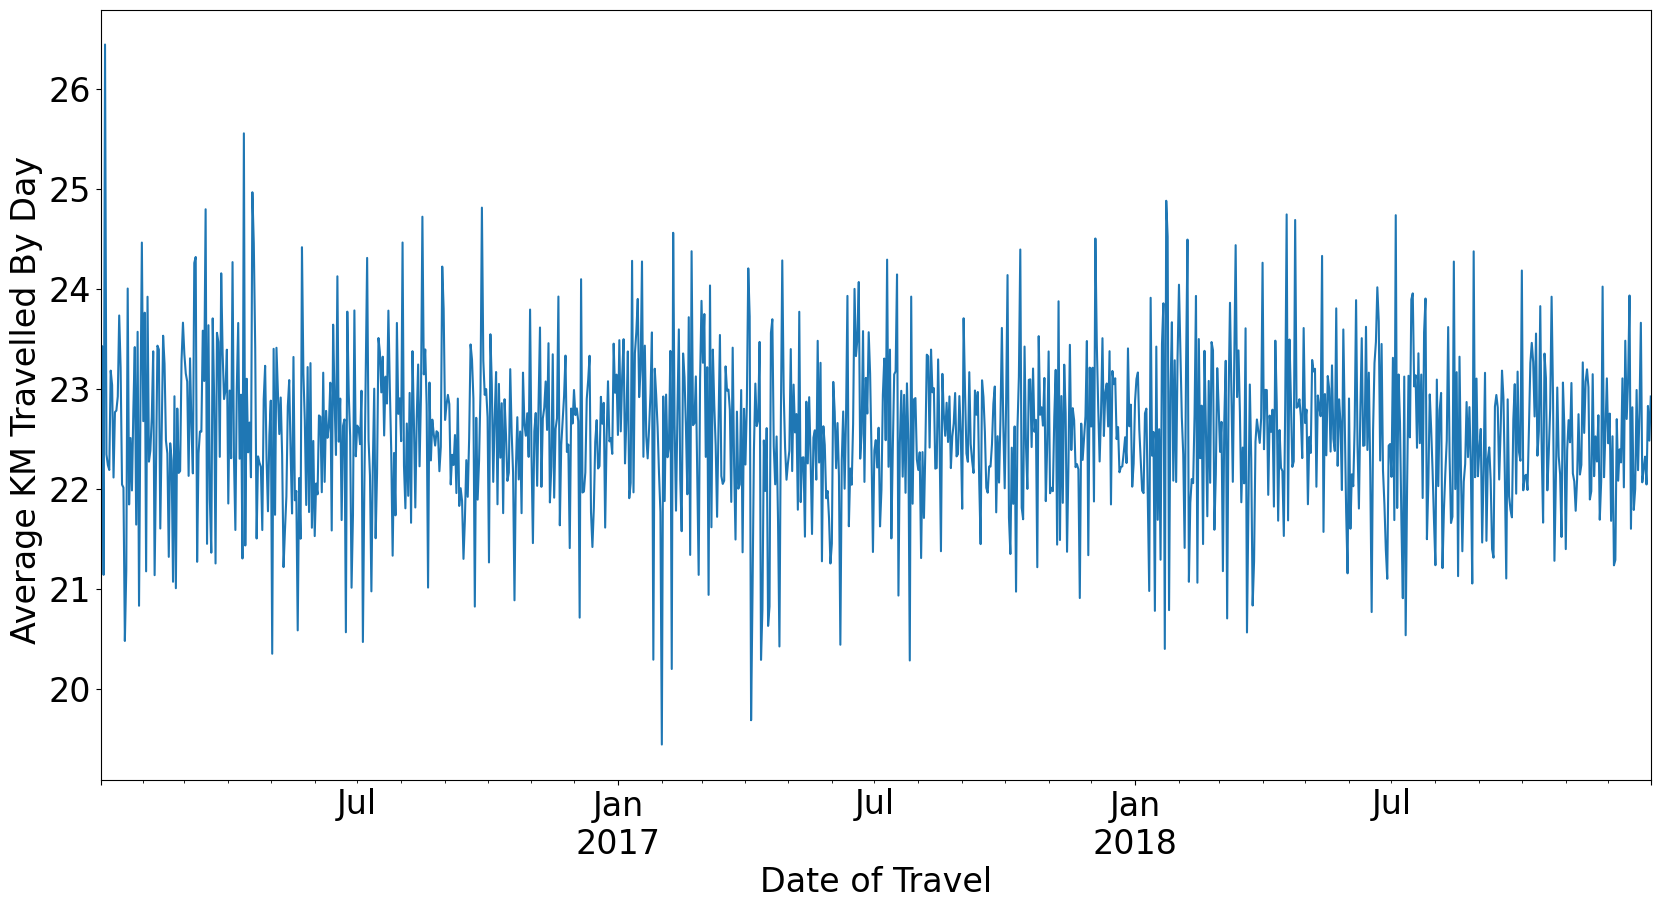

In [7]:
# create the time series plot using resampling
# make sure the time column is actually time format
# Refer from the website tutorial: https://regenerativetoday.com/a-complete-guide-to-time-series-analysis-in-pandas/
df_Cab2 = pd.read_csv(r'/Users/lucyleng/Documents/GitHub/DataSets/Cab_Data.csv', parse_dates=['Date of Travel'], index_col="Date of Travel")
df_Cab2['KM Travelled'].resample('D').mean().plot(figsize=(20, 10),fontsize=24)
plt.xlabel('Date of Travel', fontsize=24)
plt.ylabel('Average KM Travelled By Day ', fontsize=24)

We need to resample the data to get a clearer trend from the time series plot, since multiple recordes can occur in one day. We took the mean of the y axis by day

Text(0, 0.5, 'Average Price Charded By Day ')

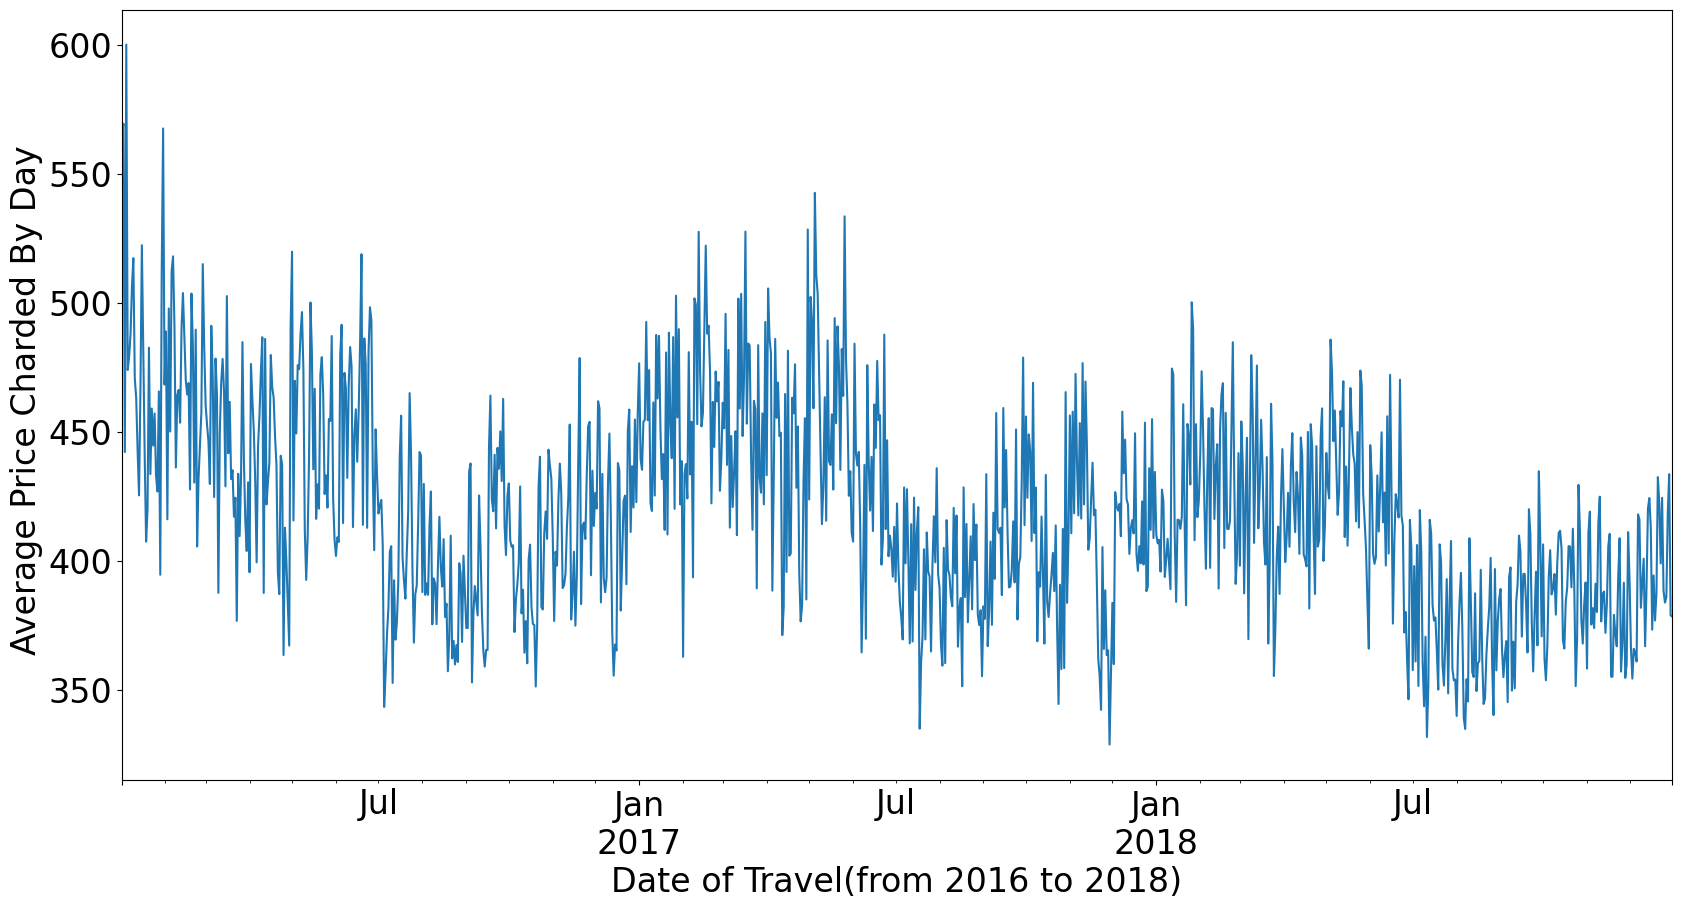

In [8]:
# create the time series plot using resampling
# make sure the time column is actually time format
# Refer from the website tutorial: https://regenerativetoday.com/a-complete-guide-to-time-series-analysis-in-pandas/
df_Cab2['Price Charged'].resample('D').mean().plot(figsize=(20, 10),fontsize=24)
plt.xlabel('Date of Travel(from 2016 to 2018)', fontsize=24)
plt.ylabel('Average Price Charded By Day ', fontsize=24)

The plot above does show some seasonality trend as we can observe from the time sereis plot. THe average daily price charge seems to drop down after July every year, and reaches the peak before July.

### Customer_ID.csv ###

In [9]:
# customer id data 
df_Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [10]:
# Checking null variables
df_Customer_ID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

**What is the distribution of customer groups by gender and age?**

### Transaction_ID.csv ###

In [11]:
# transaction id data 
df_Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [12]:
# Checking null variables
df_Transaction_ID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

### City.csv ###

In [13]:
df_City.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [14]:
# Checking null variables
df_City.isnull().sum()


City          0
Population    0
Users         0
dtype: int64

In [15]:
df_City

                City  Population     Users
0        NEW YORK NY   8405837.0  302149.0
1         CHICAGO IL   1955130.0  164468.0
2     LOS ANGELES CA   1595037.0  144132.0
3           MIAMI FL   1339155.0   17675.0
4     SILICON VALLEY   1177609.0   27247.0
5      ORANGE COUNTY   1030185.0   12994.0
6       SAN DIEGO CA    959307.0   69995.0
7         PHOENIX AZ    943999.0    6133.0
8          DALLAS TX    942908.0   22157.0
9         ATLANTA GA    814885.0   24701.0
10         DENVER CO    754233.0   12421.0
11         AUSTIN TX    698371.0   14978.0
12        SEATTLE WA    671238.0   25063.0
13         TUCSON AZ    631442.0    5712.0
14  SAN FRANCISCO CA    629591.0  213609.0
15     SACRAMENTO CA    545776.0    7044.0
16     PITTSBURGH PA    542085.0    3643.0
17     WASHINGTON DC    418859.0  127001.0
18      NASHVILLE TN    327225.0    9270.0
19         BOSTON MA    248968.0   80021.0

In [34]:
# Users in cities
import plotly.express as px
fig = px.bar(df_City, x='City', y='Users', title='Users Plot')
fig.update_layout(legend_title_text='Population & Users')
fig.update_xaxes(categoryorder='total descending')
fig

In [35]:
# Population
fig = px.bar(df_City, x='City', title='Population Plot', y='Population')
fig.update_layout(legend_title_text='Population & Users')
fig.update_xaxes(categoryorder='total descending')
fig

### df_all -- Merge and evaluate the 3 tables: Cab_Data, Customer_ID, and Transaction_ID ###         
In this three tables, they are all linked and referred by the unique colomn(primary key) "Transaction ID"

In [9]:
df1 = pd.merge(df_Transaction_ID,df_Customer_ID)
df_all = pd.merge(df1,df_Cab_Data)
df_all

        Transaction ID  Customer ID Payment_Mode  Gender  Age  \
0             10000011        29290         Card    Male   28   
1             10351127        29290         Cash    Male   28   
2             10412921        29290         Card    Male   28   
3             10000012        27703         Card    Male   27   
4             10320494        27703         Card    Male   27   
...                ...          ...          ...     ...  ...   
359387        10439790        38520         Card  Female   42   
359388        10439799        12490         Cash    Male   33   
359389        10439838        41414         Card    Male   38   
359390        10439840        41677         Cash    Male   23   
359391        10439846        39761         Card  Female   32   

        Income (USD/Month) Date of Travel     Company            City  \
0                    10813         1/8/16    Pink Cab      ATLANTA GA   
1                    10813        7/21/18  Yellow Cab      ATLANTA GA   


In [10]:
# Missing value?
df_all.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
dtype: int64

In [11]:
# Info of the merged data
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  object 
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 35.6+ MB


[Text(0.5, 1.0, 'Users Gender Distribution'), Text(0, 0.5, 'Number of Users')]

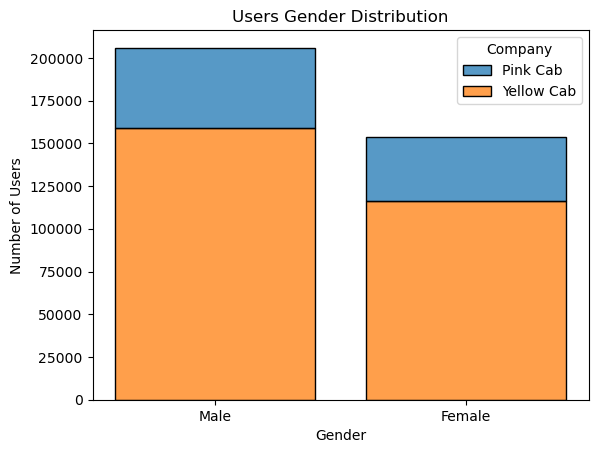

In [30]:
# Use seaborn to plot a histogram
sns.histplot(data=df_all, x="Gender", hue="Company",multiple="stack",
             shrink=.8).set(title = 'Users Gender Distribution',ylabel = 'Number of Users')

[Text(0.5, 1.0, 'Users Age Distribution'), Text(0, 0.5, 'Number of Users')]

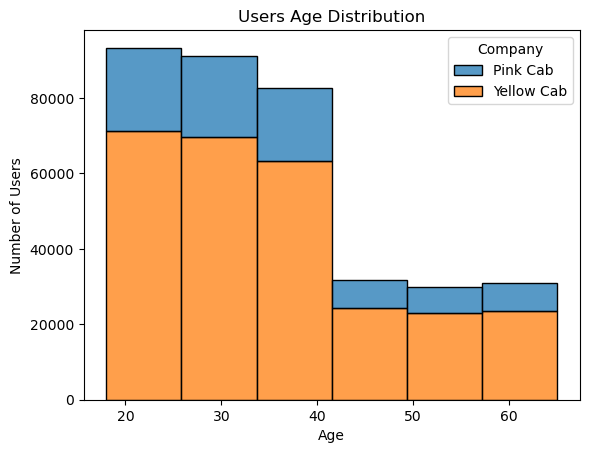

In [27]:
# Use seaborn to plot a histogram
sns.histplot(data=df_all, x="Age", bins=6,hue="Company",multiple="stack").set(title = 'Users Age Distribution',ylabel = 'Number of Users')

[Text(0.5, 1.0, 'Payment Mode Distribution'), Text(0, 0.5, 'Number of Users')]

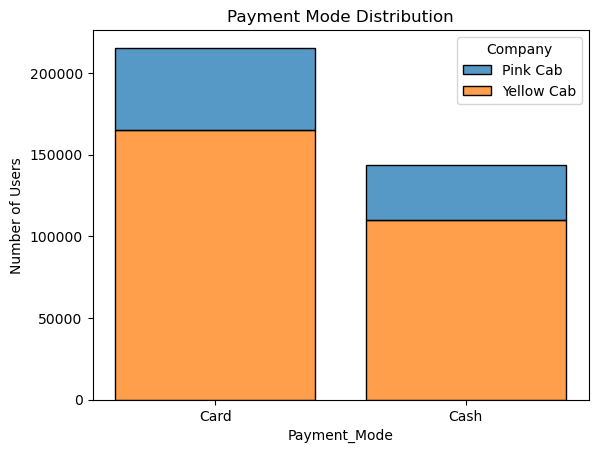

In [31]:
# Use seaborn to plot a histogram
sns.histplot(data=df_all, x="Payment_Mode", hue="Company",multiple="stack",
             shrink=.8).set(title = 'Payment Mode Distribution',ylabel = 'Number of Users')

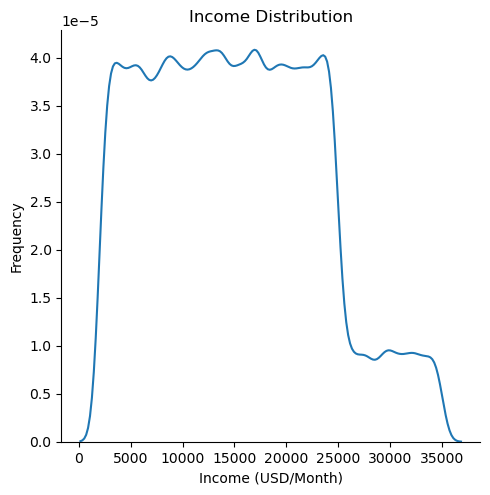

In [46]:
# Distribution plot
# Use seaborn to plot a histogram
sns.displot(data=df_all, x="Income (USD/Month)", kind="kde").set(title = 'Income Distribution',ylabel = 'Frequency')

In [75]:

# Use GroupBy() to compute the sum
df_sum = df_all.groupby('Company').sum()
df_sum = pd.DataFrame(df_sum)
df_sum = df_sum.reset_index()

[Text(0.5, 1.0, 'Total Cost of Trip of 2 Companies')]

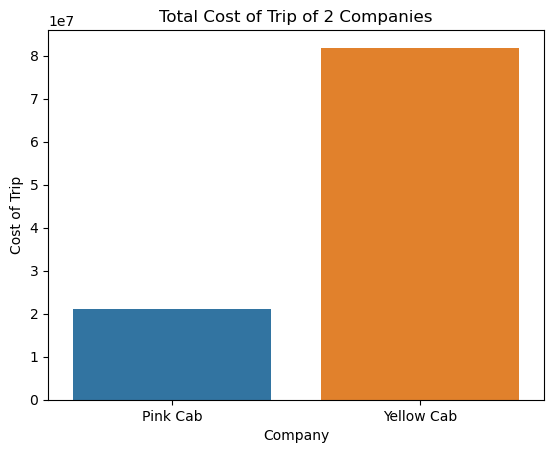

In [78]:
sns.barplot(data=df_sum, x="Company", y="Cost of Trip").set(title = 'Total Cost of Trip of 2 Companies')

[Text(0.5, 1.0, 'Total charge of 2 Companies')]

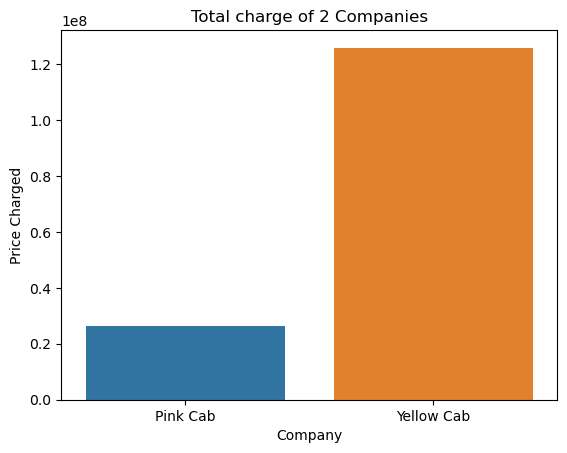

In [77]:
sns.barplot(data=df_sum, x="Company", y="Price Charged").set(title = 'Total charge of 2 Companies')

**Recommendation and Conclusions**

As we suggested in our business objectives, we can now answer this question and point out that investing in Yellow Cab would be a better option（based on total income). In this EDA, we have mainly used graphs for exploration and presentation. We first learned basic information about the four datasets and then used the PRIMARY KEY to merge three of the charts together. I don't think the last graph on population and number of users (City.csv) is suitable for merging, because this is more like an auxiliary information. We can use this City data to analyze which big cities are better for business development, such as New York, Boston, Chicago and so on. We see the distribution of users in terms of age, gender, and income, and also the presence of seasonality in cab prices. We can say that in general, more users are male, earn less than 25K, and are under 40 years old. cab companies should decide their marketing and advertising strategies based on these profiles of users.

Reference Links <br>
https://seaborn.pydata.org/generated/seaborn.histplot.html

A data intake report is attached